In [29]:
from cellpose.models import Cellpose
from hcrp import *
from skimage.io import imread
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from IPython import get_ipython
ipython = get_ipython()
if ipython.execution_count == 1:
    os.chdir('..') # because kernel initiates in scripts folder, only runs on first import

In [30]:
# # CHANGE TO PATH
# folder = f"{get_path('dropbox.txt')}/Anqi/Intership/AI_segmentation/Dataset3_tkv_dad_dpp_Nuclei/"
# filename = "Td_Hoechst_dad488_dpp546_tkv647_20240521_Embryo02_T1.tif"
# label_location = "data/SilverFish_Pilot"
# channel_names = ["tkv", "dpp", "dad", "nuclear"]

# channel_types = ["hcr", "hcr", "hcr", "nuclear"]
# results_path = f"data/{filename.split('.')[0]}_results"
# # EDIT HCR PARAMETERS IF NEEDED
# tkv_params = DEFAULT_HCR_PARAMS.copy()
# stack = imread(f"{folder}/{filename}")
# n_z = stack.shape[0]
# tkv_params["dot_intensity_thresh"] = np.percentile(stack[n_z//2, :, :, 0].flatten(), 60)
# tkv_params["verbose"] = False
# dpp_params = DEFAULT_HCR_PARAMS.copy()
# dpp_params["dot_intensity_thresh"] = None
# dad_params = DEFAULT_HCR_PARAMS.copy()
# dad_params["dot_intensity_thresh"] = None
# hcr_params = [tkv_params, dpp_params, dad_params, None]

In [31]:
# CHANGE TO PATH
folder = f"{get_path('dropbox.txt')}/Anqi/Intership/AI_segmentation/Dataset4_dad_dpp_pMad_Nuclei/"
filename = "Td_Hoechst_pMad488_dpp546_dad647_20240522_Embryo02_T1.tif"
label_location = "data/SilverFish_Pilot"
channel_names = ["tkv", "dpp", "dad", "nuclear"]

channel_types = ["hcr", "hcr", "hcr", "nuclear"]
results_path = f"data/{filename.split('.')[0]}_results"
# EDIT HCR PARAMETERS IF NEEDED
tkv_params = DEFAULT_HCR_PARAMS.copy()
stack = imread(f"{folder}/{filename}")
n_z = stack.shape[0]
tkv_params["dot_intensity_thresh"] = np.percentile(stack[n_z//2, :, :, 0].flatten(), 60)
tkv_params["verbose"] = False
dpp_params = DEFAULT_HCR_PARAMS.copy()
dpp_params["dot_intensity_thresh"] = np.percentile(stack[n_z//2, :, :, 0].flatten(), 60)
dad_params = DEFAULT_HCR_PARAMS.copy()
dad_params["dot_intensity_thresh"] = np.percentile(stack[n_z//2, :, :, 0].flatten(), 60)
hcr_params = [tkv_params, dpp_params, dad_params, None]

In [32]:
# folder = f"{get_path('dropbox.txt')}/Anqi/Intership/AI_segmentation/Figures/"
# filename = "Td_Hoechst_dad488_dpp546_tkv647_20240521_Embryo04_T1-1-2-1-1.tif"
# label_location = "data/SilverFish_Pilot"
# channel_names = ["tkv", "dpp", "dad", "nuclear"]

# channel_types = ["hcr", "hcr", "hcr", "nuclear"]
# results_path = f"data/{filename.split('.')[0]}_results"
# # EDIT HCR PARAMETERS IF NEEDED
# tkv_params = DEFAULT_HCR_PARAMS.copy()
# stack = imread(f"{folder}/{filename}")
# n_z = stack.shape[0]
# tkv_params["dot_intensity_thresh"] = np.percentile(stack[n_z//2, :, :, 0].flatten(), 60)
# tkv_params["verbose"] = False
# dpp_params = DEFAULT_HCR_PARAMS.copy()
# dpp_params["dot_intensity_thresh"] = None
# dad_params = DEFAULT_HCR_PARAMS.copy()
# dad_params["dot_intensity_thresh"] = None
# hcr_params = [tkv_params, dpp_params, dad_params, None]

In [33]:
# # CHANGE TO PATH
# folder = f"{get_path('dropbox.txt')}/Anqi/Intership/AI_segmentation/Dataset4_dad_dpp_pMad_Nuclei/"
# filename = "Td_Hoechst_pMad488_dpp546_dad647_20240522_Embryo04_T1.tif"
# label_location = "data/SilverFish_Pilot"
# channel_names = ["dad", "dpp", "pmad", "nuclear"]
# channel_types = ["hcr", "hcr", "staining", "nuclear"]
# results_path = f"data/{filename.split('.')[0]}_results"
# # EDIT HCR PARAMETERS IF NEEDED
# params = DEFAULT_HCR_PARAMS.copy()
# stack = imread(f"{folder}/{filename}")
# n_z = stack.shape[0]
# params["dot_intensity_thresh"] = 322
# params["sigma_blur"] = 1
# params["verbose"] = False
# dpp_params = params.copy()
# dpp_params["dot_intensity_thresh"] = None
# dpp_params["sigma_blur"] = 1
# hcr_params = [params, dpp_params, None, None]

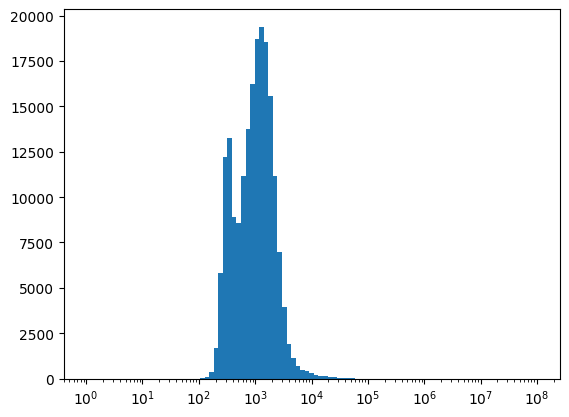

In [34]:
sig = stack[19,:,:,1]
thresh = 160
fig, ax = plt.subplots()
bins = np.logspace(0, np.log(np.percentile(sig, 95)), 100)
hist, _, _ = ax.hist(sig.flatten()+1, bins=bins, density=False)
thresh = 1000
# ax.vlines(thresh, 0, hist.max(), color='r')
ax.set(xscale="log")
plt.show()

In [35]:
# # endoderm ectoderm
# folder = f"{get_path('dropbox.txt')}/Anqi/Intership/AI_segmentation/Figures/"
# filename = "Td_Hoechst_dad488_dpp546_tkv647_20240521_Embryo04_T1-1-2-1-1.tif"
# label_location = "data/SilverFish_Pilot"


In [36]:
# RUN THE CODE
# for some reason the matplotlib labelling doesn't work in notebooks. Use label.py to label.
midline, contour, background, z_midline, endoderm = load_labels_safe(
    folder, label_location, filename
)
z = z_midline-1
stack = imread(f"{folder}/{filename}")
masks, cell_data, hcr_data = process_layer(
    z,
    folder,
    filename,
    label_location,
    results_path=results_path,
    channel_names=channel_names,
    channel_types=channel_types,
    hcr_params=hcr_params,
    diameter=26
)

Saved results to data/Td_Hoechst_pMad488_dpp546_dad647_20240522_Embryo04_T1_results


/var/folders/v5/n74tqddd4g71866g8553_4mr0000gp/T/ipykernel_23401/407309368.py:9: RuntimeWarning: divide by zero encountered in divide
  plt.plot(hcr_counts/cell_counts)
/var/folders/v5/n74tqddd4g71866g8553_4mr0000gp/T/ipykernel_23401/407309368.py:9: RuntimeWarning: invalid value encountered in divide
  plt.plot(hcr_counts/cell_counts)


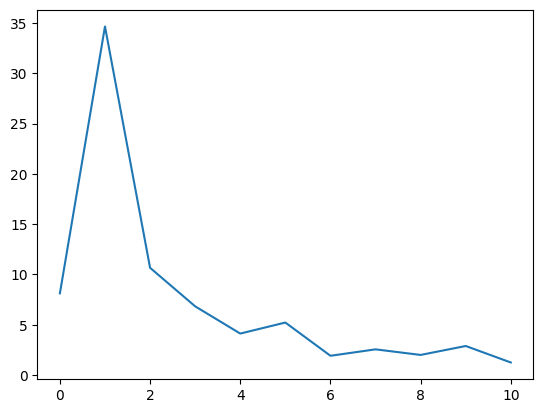

In [37]:
bins = np.linspace(0,500, 15)
cell_counts = np.histogram(cell_data["spline_dist"], bins=bins)[0]
hcr_counts= np.histogram(hcr_data[1]["spline_dist"], bins=bins)[0]
# plt.hist(hcr_data[0]["spline_dist"], bins=50)
# plt.imshow(stack[z, :, :, 0], cmap='afmhot', vmax=np.mean(stack[z, :, :, 0])+np.std(stack[z, :, :, 0])*2)
# plt.scatter(cell_data["y"], cell_data["x"], c=cell_data["spline_dist"], s=10)
# plt.plot(midline[:,1], midline[:,0], c='r')
# plt.plot(contour[:,1], contour[:,0], c='r')
plt.plot(hcr_counts/cell_counts)

In [ ]:
# plotting against pmad didn't work

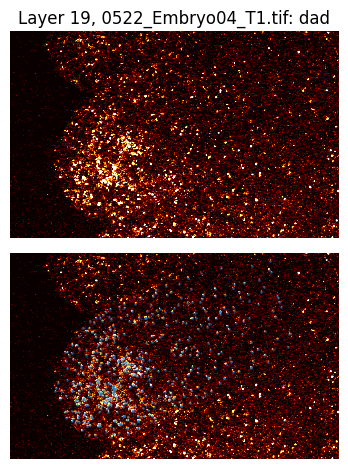

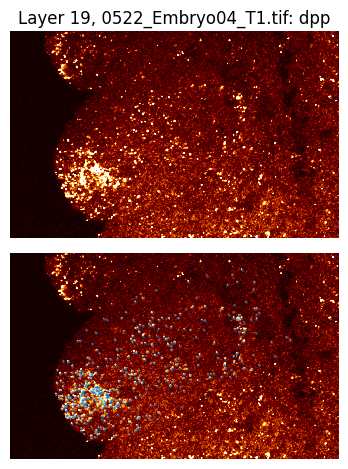

In [38]:
# PLOT THE HCR RESULTS 
for i, (cname, ctype) in enumerate(zip(channel_names, channel_types)):
    if ctype=="hcr":
        fig, ax = plot_hcr(hcr_data[i], stack[z, :, :, i])
        ax[0].set(title=f"Layer {z}, {filename[-20:]}: {cname}")
        plt.tight_layout()
        plt.savefig(f"media/hcr_results_{cname}.png", dpi=600)

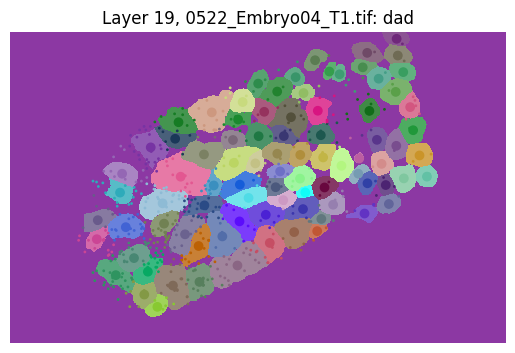

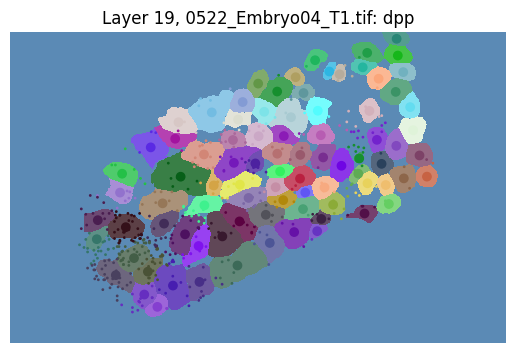

In [39]:
# PLOT ALLOCATION
np.random.seed(2)
for i, (cname, ctype) in enumerate(zip(channel_names, channel_types)):
    if ctype=="hcr":
        fig, ax = plot_hcr_cell_projection(hcr_data[i], cell_data, masks, stack[z, :, :, i])
        ax.set(title=f"Layer {z}, {filename[-20:]}: {cname}")
        ax.axis("off")
        plt.savefig("media/allocation.png")

TypeError: scatter() missing 1 required positional argument: 'y'

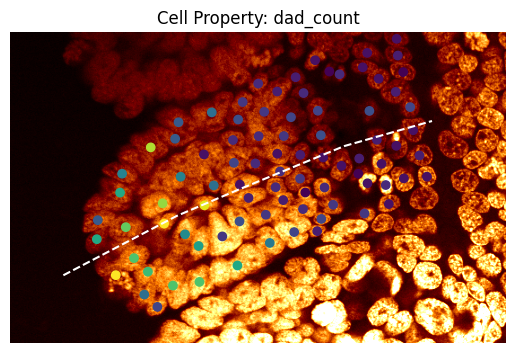

In [40]:
np.random.seed(2)
for i, (cname, ctype) in enumerate(zip(channel_names, channel_types)):
    if ctype=="hcr":
        fig, ax = plot_cell_property(cell_data, stack[z, :, :, 3], "dad_count")
        ax.plot(midline[:,1], midline[:,0], c='w', linestyle="--")
        ax.scatter(cell_data["y"])
        ax.set(title=f"Layer {z}, {filename[-20:]}: {cname}")
        ax.axis("off")
        plt.savefig("media/allocation.png")

,x,y,area,z,tkv_count,dpp_count,dad_count,spline_dist,endoderm,ectoderm
label,,,,,,,,,,
1,40.076577,473.304054,888.0,19,3,4,1,467.963365,False,True
2,50.317164,432.985075,268.0,19,0,5,2,422.487100,False,True
3,62.762019,354.545673,416.0,19,2,4,3,346.111437,False,True
4,64.355556,451.713889,720.0,19,0,1,1,438.356187,False,True
5,61.026596,378.555851,376.0,19,0,4,6,367.622943,False,True
...,...,...,...,...,...,...,...,...,...,...
125,332.534752,138.356028,705.0,19,20,4,34,59.779556,False,True
126,320.000000,96.000000,1.0,19,16,10,17,26.066958,False,True
127,339.204900,79.004454,449.0,19,9,10,14,3.579205,False,True


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Cell Property: endoderm'}>)

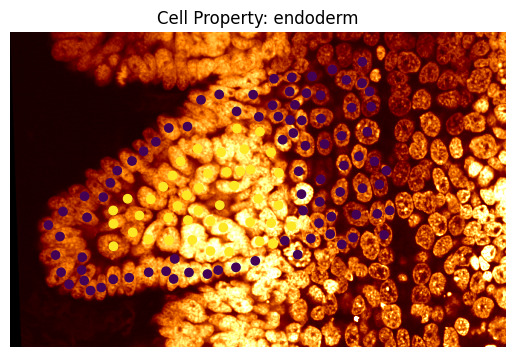

In [ ]:
# PLOT ENDODERM
plot_cell_property(cell_data, stack[z, :, :, 3], "endoderm")

In [ ]:
fig, ax = plt.subplots()

TypeError: list indices must be integers or slices, not str

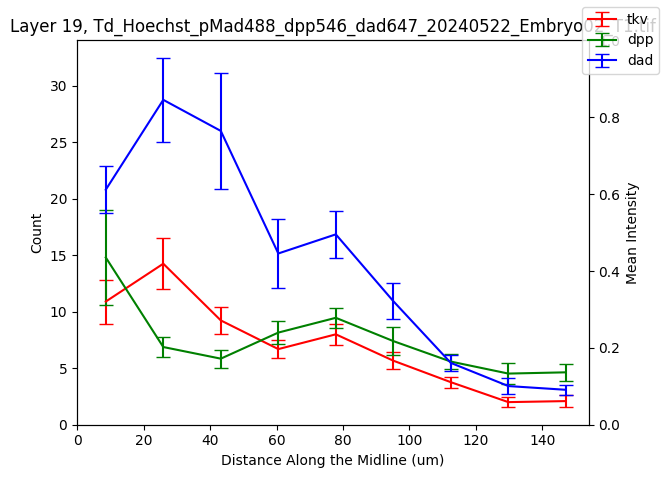

In [ ]:
# PLOT GRADIENTS in all cells
%matplotlib inline
fig, ax = plot_gradients(channel_names, channel_types, cell_data, pixel_to_mu=1/2.8906, err_type="std_err", bin_size=50)
ax.set(title=f"Layer {z}, {filename}")  
plt.tight_layout()
plt.savefig(f"{results_path}/{filename.split('.')[0]}_gradients.pdf")

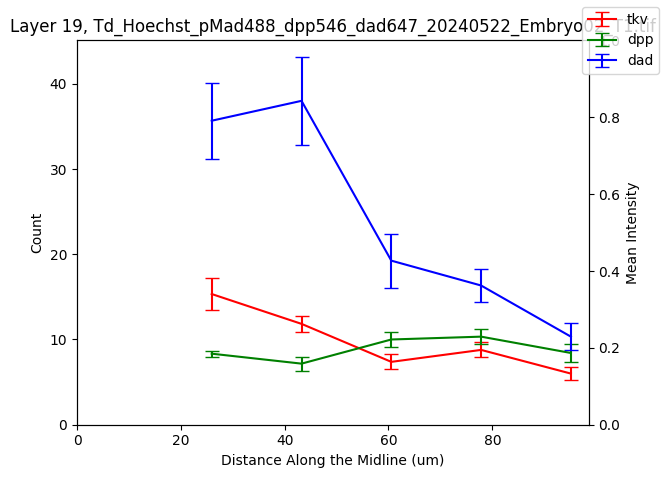

In [ ]:
# PLOT GRADIENTS 
%matplotlib inline
fig, ax = plot_gradients(channel_names, channel_types, cell_data[cell_data["endoderm"]], pixel_to_mu=1/2.8906, err_type="std_err", bin_size=50)
ax.set(title=f"Layer {z}, {filename}")  
plt.tight_layout()
plt.savefig(f"{results_path}/{filename.split('.')[0]}_gradients.pdf")

In [ ]:
# RUN FOR MULTIPLE Z
midline, contour, background, z_midline, endoderm = load_labels_safe(
    folder, label_location, filename
)
z = z_midline 
stack = imread(f"{folder}/{filename}")
z_range = np.array((range(z_midline-2, z_midline+3)))
cell_datas = []
hcr_datas = []
for z in z_range:
    print(f'Running z = {z}')
    masks_z, cell_data_z, hcr_data_z = process_layer(
        z,
        folder,
        filename,
        label_location,
        results_path=None,
        channel_names=channel_names,
        channel_types=channel_types,
        hcr_params=hcr_params,
        diameter=27.5,
    )
    cell_datas.append(cell_data_z)
    hcr_datas.append(hcr_data_z)
cell_data_multi = pd.concat(cell_datas, ignore_index=True)
hcr_datas = np.array(hcr_datas, dtype="object")
hcr_data_multi = [pd.concat(hcr_datas[:, i], axis=0) if ctype=="hcr" else None for i, ctype in enumerate(channel_types)]
cell_data_multi.to_csv(f"{results_path}/{filename.split('.')[0]}_cell_data.csv")

Running z = 18
Running z = 19
Running z = 20
Running z = 21
Running z = 22


In [ ]:

# dad 808, dpp 591
# dad 882, dpp 785
# TOTAL dad 1690, dpp 1376

(<Figure size 640x480 with 3 Axes>,
 array([<Axes: ylabel='tkv Count'>, <Axes: ylabel='dpp Count'>,
        <Axes: xlabel='Distance Along the Midline (um)', ylabel='dad Count'>],
       dtype=object))

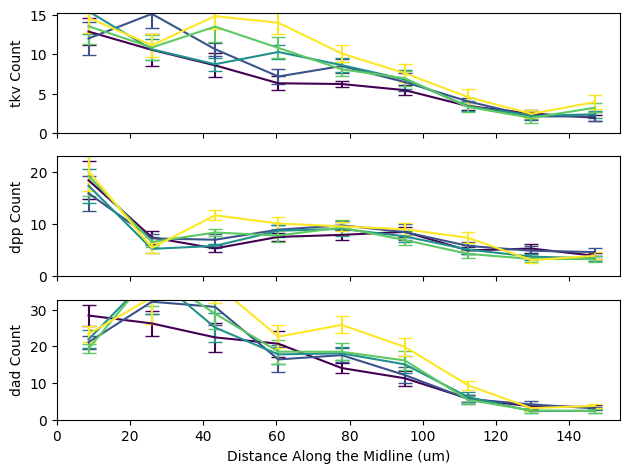

In [ ]:
%matplotlib inline
plot_layer_gradients(z_range, channel_names, channel_types, cell_data_multi, pixel_to_mu=1/2.8906, err_type="std_err")

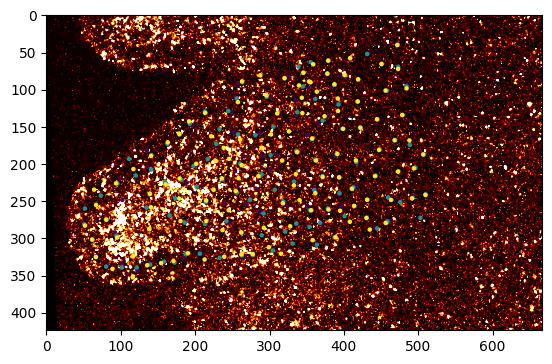

In [ ]:
data = cell_data_multi[np.in1d(cell_data_multi["z"], [z_midline-1, z_midline, z_midline+1])]
plt.imshow(stack[z_midline, :, :, 0], cmap="afmhot", vmax=np.mean(stack[z_midline, :, :, 0])+2*np.std(stack[z_midline, :, :, 0]))
plt.scatter(data["y"], data["x"], c=data["z"], cmap="viridis", s=5)

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Distance Along the Midline (um)', ylabel='Count'>)

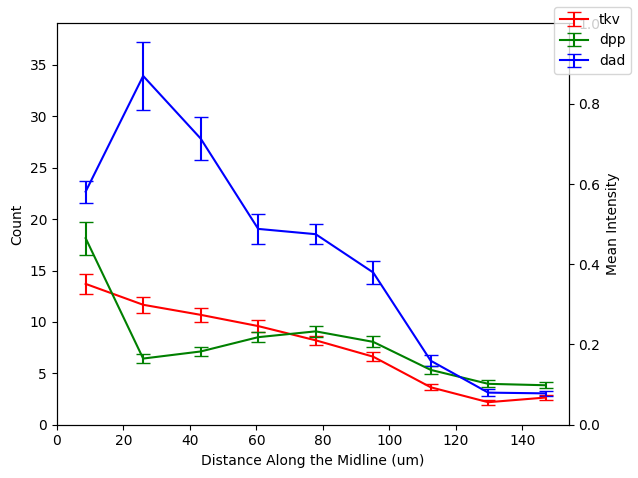

In [ ]:
plot_gradients( channel_names, channel_types, cell_data_multi, pixel_to_mu=1/2.8906, err_type="std_err")

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Cell Property: endoderm'}>)

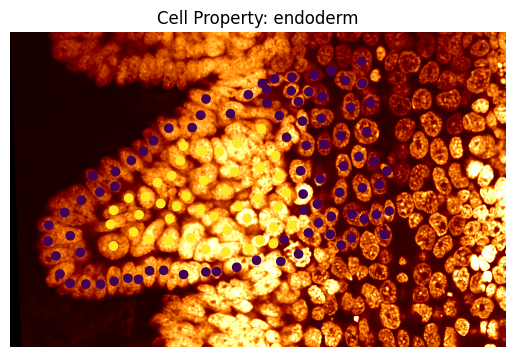

In [ ]:
%matplotlib inline
z = z_midline
plot_cell_property(cell_data_multi[cell_data_multi["z"]==z], stack[z, :, :, 3], "endoderm")

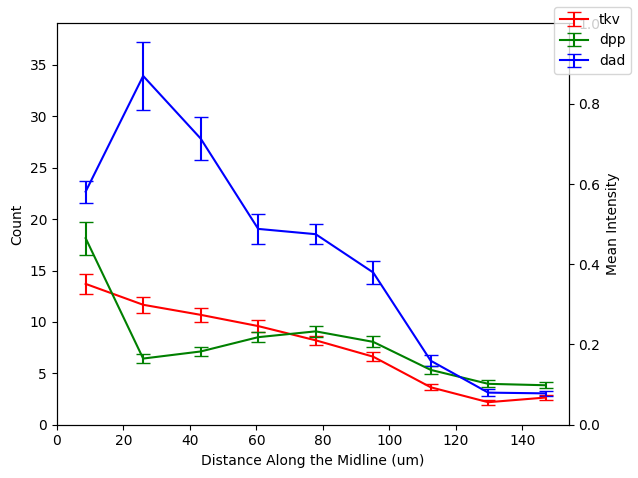

In [ ]:
%matplotlib inline
fig, ax = plot_gradients(channel_names, channel_types, cell_data_multi, pixel_to_mu=1/2.8906, err_type="std_err")
# ax.set(title=f"Layer {z_range[0]}-{z_range[-1]}, {filename}")
# plt.tight_layout()

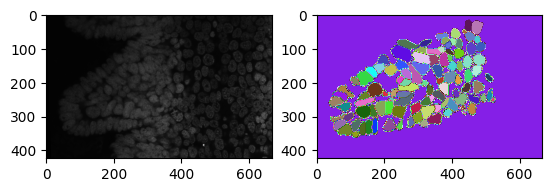

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(stack[z_midline, :, :, 3], cmap="gray")
ax[1].imshow(masks_z, cmap=get_random_cmap(masks_z.max()+1), alpha=1)

In [ ]:
folder = f"{get_path('dropbox.txt')}/Anqi/Intership/AI_segmentation/Dataset1_brk_dpp_pMad_Nuclei/Limb_Ext_Stg01"
filename = "Stg01_Emb03_T102.tif"
stack = imread(f"{folder}/{filename}")
z = 10
hist = plt.hist(stack[z,:,:,0].flatten(), bins=np.linspace(0,3000))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/nicholb/Dropbox/Anqi/Intership/AI_segmentation/Dataset1_brk_dpp_pMad_Nuclei/Limb_Ext_Stg01/Stg01_Emb03_T102.tif'